In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import pandas as pd 


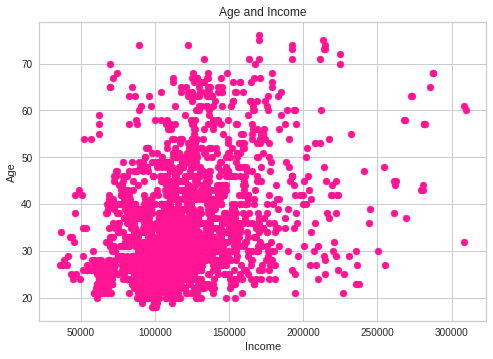

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
data = 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
df = pd.read_csv(data)
fig, ax = plt.subplots()
x = df["Income"]    
y = df["Age"]
plt.ylabel("Age") 
plt.xlabel("Income")
plt.title("Age and Income")

ax.scatter(x, y, c = 'deeppink')   
plt.show()

df.head()

<Figure size 720x432 with 0 Axes>

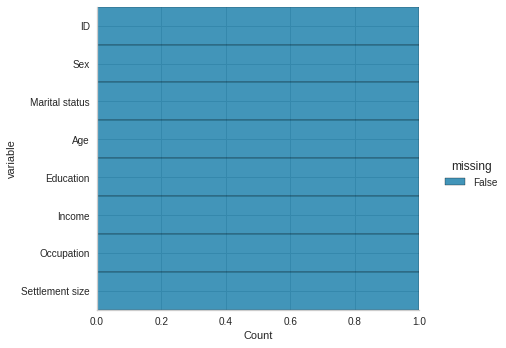

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspe
    ct=1.25
)
#Пропущенных данных нет

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


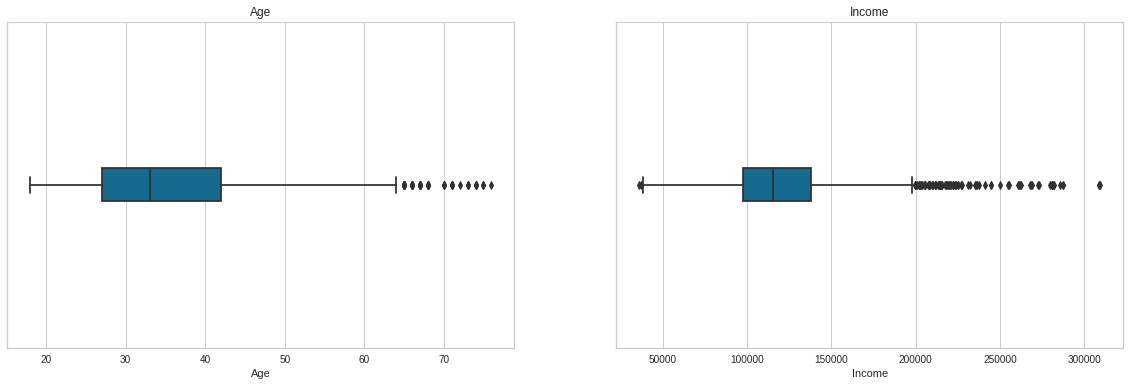

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))  

sns.boxplot(df['Age'], ax=ax[0], width=0.1)
sns.boxplot(df['Income'], ax=ax[1], width=0.1)
ax[0].set_title("Age")
ax[1].set_title("Income")
#Много людей с доходом выше 200000 и людей старше 64 лет, также есть люди с доходом ниже 30000
plt.show()

<BarContainer object of 2000 artists>

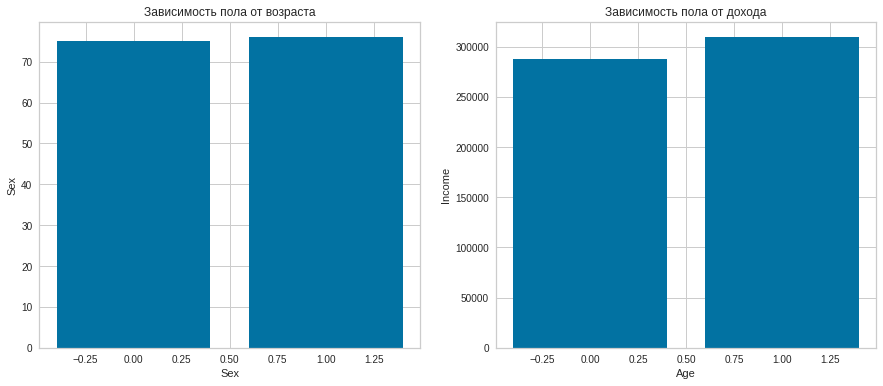

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15,6))
x=df["Sex"]
y1=["Income"]
y2=["Age"]
ax[0].set_title('Зависимость пола от возраста')
ax[1].set_title("Зависимость пола от дохода")
ax[0].set_xlabel("Sex")
ax[1].set_xlabel("Age")
ax[0].set_ylabel("Sex")
ax[1].set_ylabel("Income")
ax[0].bar(df["Sex"],df["Age"])
ax[1].bar(df["Sex"],df["Income"])
#В среднем мужчины имеют зарабаток выше. В среднем пожилых мужчин больше, чем женщин. 

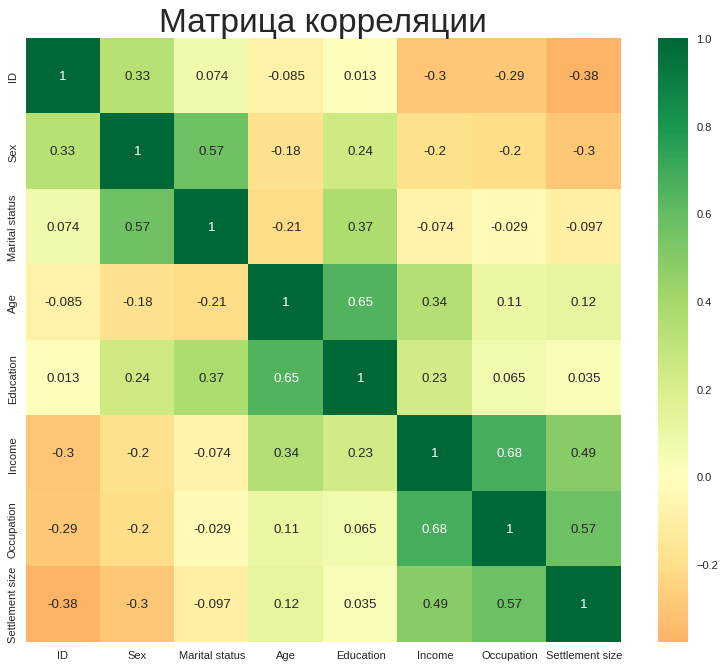

In [54]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#Наибольшую зависимость имеет возраст от образование. Наименьшую имеет ID от Settlement size

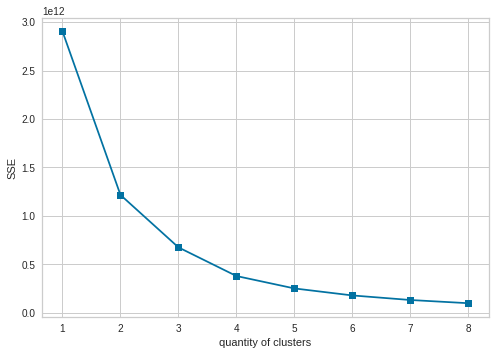

In [57]:
SSE = [] 

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('quantity of clusters')
plt.ylabel('SSE');
plt.show()
#4 кластера - оптимально

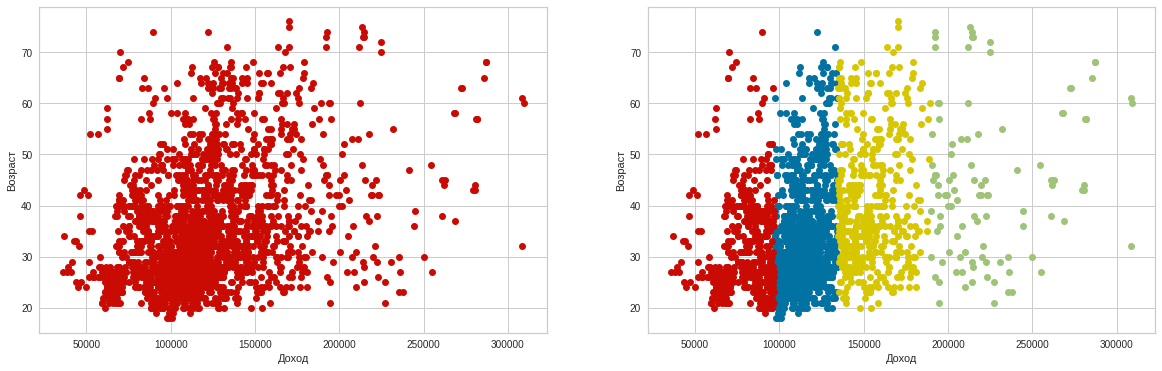

In [64]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['cluster'] = kmeans.labels_
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].plot(df['Income'], df['Age'], 'ro')
ax[0].set_xlabel('Доход')
ax[0].set_ylabel('Возраст')

ax[1].plot(df[df['cluster']==0]['Income'], df[df['cluster']==0]['Age'], 'bo', label='class1')

ax[1].plot(df[df['cluster']==1]['Income'], df[df['cluster']==1]['Age'], 'go', label='class2')

ax[1].plot(df[df['cluster']==2]['Income'], df[df['cluster']==2]['Age'], 'ro', label='class3')

ax[1].plot(df[df['cluster']==3]['Income'], df[df['cluster']==3]['Age'], 'yo', label='class3')

ax[1].set_xlabel('Доход')
ax[1].set_ylabel('Возраст')
plt.show()
#Объекты разделились по доходу от 30000 до 100000. От 100000 до 150000. Выше 200000

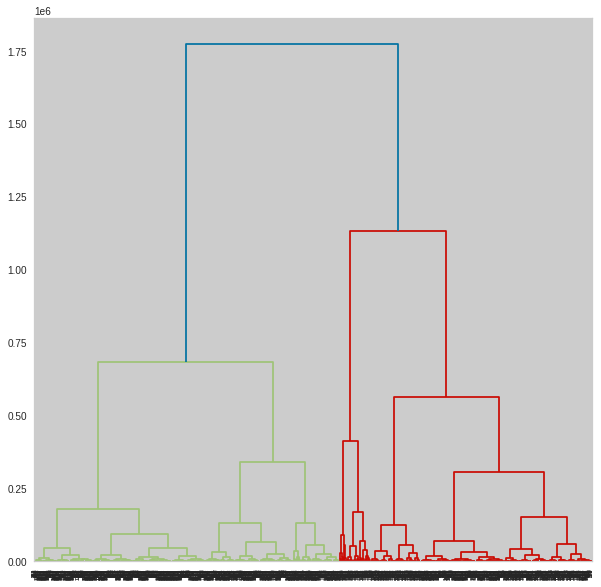

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(df, 'ward')
fig = plt.figure(figsize=(10, 10))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
dn = dendrogram(Z)
#Наиболее подходящее 5 кластеров, то есть на высоте 0.68 по y    


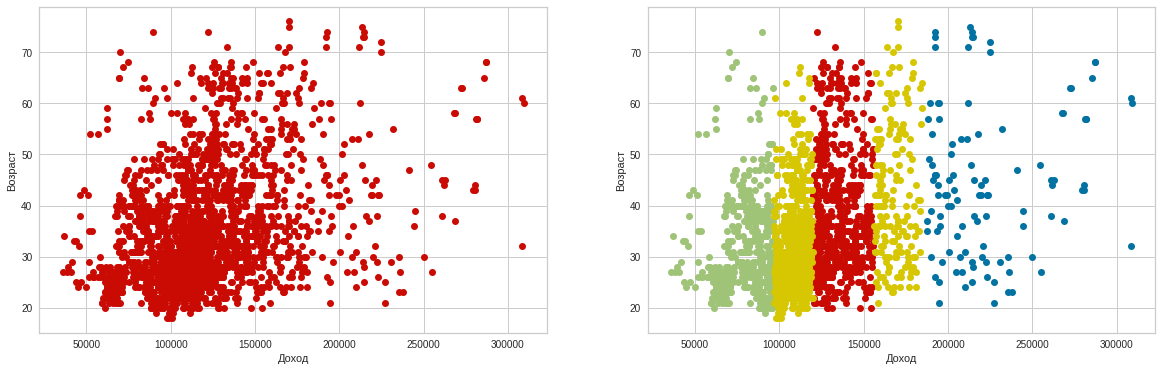

In [68]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
df["clusters"] = hc.fit_predict(df)
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].plot(df['Income'], df['Age'], 'ro')
ax[0].set_xlabel('Доход')
ax[0].set_ylabel('Возраст')

ax[1].plot(df[df['clusters']==0]['Income'], df[df['clusters']==0]['Age'], 'bo', label='class1')

ax[1].plot(df[df['clusters']==1]['Income'], df[df['clusters']==1]['Age'], 'go', label='class2')

ax[1].plot(df[df['clusters']==2]['Income'], df[df['clusters']==2]['Age'], 'ro', label='class3')

ax[1].plot(df[df['clusters']==3]['Income'], df[df['clusters']==3]['Age'], 'yo', label='class3')

ax[1].plot(df[df['clusters']==4]['Income'], df[df['clusters']==4]['Age'], 'yo', label='class3')

ax[1].set_xlabel('Доход')
ax[1].set_ylabel('Возраст')
plt.show()